In [1]:
import tensorflow.keras as keras
print(keras.__version__)

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, concatenate, add

2.4.0


Using TensorFlow backend.


In [2]:
model = inputs = Input((28, 28, 256))

route_1 = Conv2D(filters=128, kernel_size=1, padding='same')(model)

route_2 = Conv2D(filters=64, kernel_size=1, padding='same')(model)
route_2 = Conv2D(filters=192, kernel_size=3, padding='same')(route_2)

route_3 = Conv2D(filters=64, kernel_size=1, padding='same')(model)
route_3 = Conv2D(filters=96, kernel_size=5, padding='same')(route_3)

route_4 = MaxPool2D(pool_size=3, strides=1, padding='same')(model)
route_4 = Conv2D(filters=64, kernel_size=1, padding='same')(route_4)

outputs = concatenate([route_1, route_2, route_3, route_4])
Inception_module = Model(inputs=inputs, outputs=outputs, name='Inception module')

Inception_module.summary()

Model: "Inception module"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 256) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   16448       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 64)   16448       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 256)  0           input_1[0][0]                    
___________________________________________________________________________________

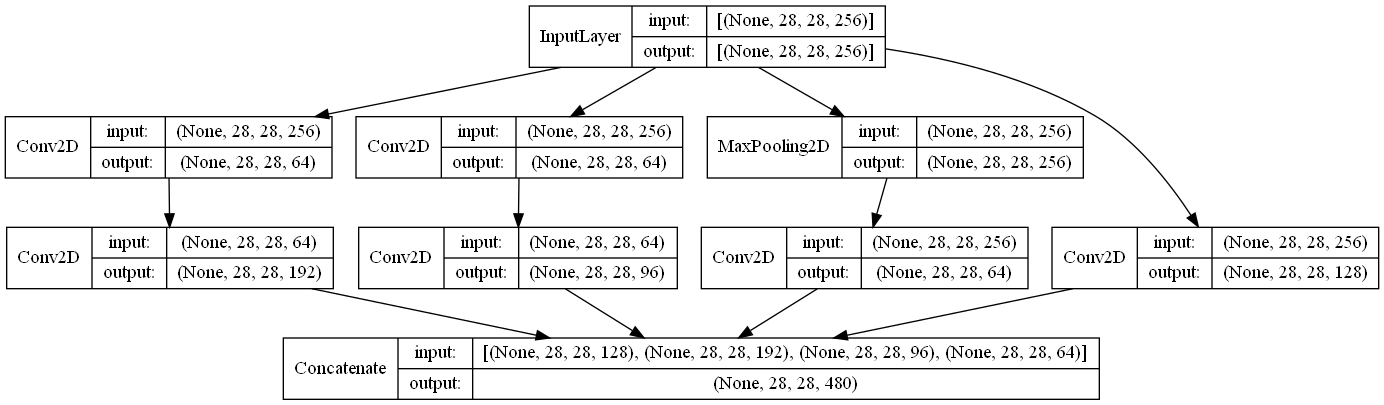

In [3]:
keras.utils.plot_model(Inception_module, to_file='Inception_module.png', show_shapes=True, show_layer_names=False)

In [4]:
model = inputs = Input((28, 28, 256))

model = Conv2D(filters=64, kernel_size=1, padding='same')(model)
model = Conv2D(filters=64, kernel_size=3, padding='same')(model)
model = Conv2D(filters=256, kernel_size=1, padding='same')(model)

outputs = add([inputs, model])
ResNet_module = Model(inputs=inputs, outputs=outputs, name='ResNet module')

ResNet_module.summary()

Model: "ResNet module"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 256) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 28, 28, 64)   16448       input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 64)   36928       conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 256)  16640       conv2d_7[0][0]                   
______________________________________________________________________________________

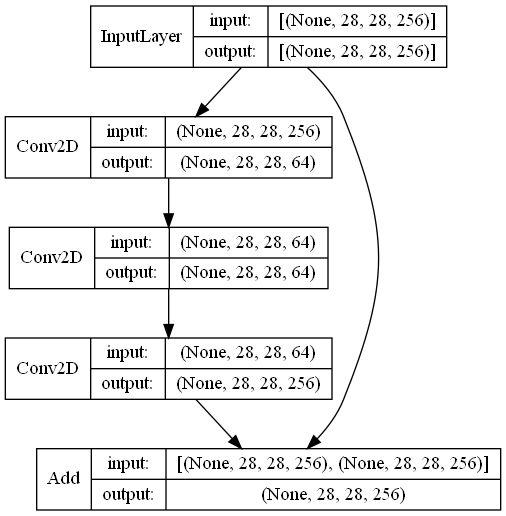

In [5]:
keras.utils.plot_model(ResNet_module, to_file='ResNet_module.png', show_shapes=True, show_layer_names=False)